# Soft and Hard Detection

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Función para generar bits aleatorios
def generar_bits(num_bits):
    return np.random.randint(0, 2, num_bits)

# Modulación BPSK
def bpsk_modulacion(bits):
    return 2 * bits - 1  # Mapear 0 -> -1, 1 -> +1

# Canal AWGN (ruido gaussiano aditivo)
def canal_awgn(signal, snr_db):
    snr_linear = 10**(snr_db / 10)  # Convertir SNR de dB a escala lineal
    potencia_signal = np.mean(np.abs(signal)**2)  # Potencia de la señal
    potencia_ruido = potencia_signal / snr_linear
    ruido = np.sqrt(potencia_ruido / 2) * np.random.randn(len(signal))
    return signal + ruido

# Hard-Detection
def hard_detection(received_signal):
    return (received_signal > 0).astype(int)

# Soft-Detection (Log-Likelihood Ratio)
def soft_detection(received_signal, noise_variance):
    llr = 2 * received_signal / noise_variance
    return llr

# Decodificación basada en Soft-Detection
def soft_to_hard(llr_values):
    return (llr_values > 0).astype(int)

# Cálculo de BER (Bit Error Rate)
def calcular_ber(bits_tx, bits_rx):
    errores = np.sum(bits_tx != bits_rx)
    return errores / len(bits_tx)

In [4]:
# Configuración del sistema
num_bits = 10000         # Número de bits a transmitir
snr_db = 5               # Relación señal a ruido en dB
bits_tx = generar_bits(num_bits)  # Bits transmitidos
mod_signal = bpsk_modulacion(bits_tx)  # Señal modulada

# Paso por el canal AWGN
received_signal = canal_awgn(mod_signal, snr_db)

In [5]:
# HARD-DETECTION
bits_rx_hard = hard_detection(received_signal)
ber_hard = calcular_ber(bits_tx, bits_rx_hard)

In [6]:
# SOFT-DETECTION
noise_variance = 10**(-snr_db / 10)  # Varianza del ruido
llr_values = soft_detection(received_signal, noise_variance)
bits_rx_soft = soft_to_hard(llr_values)
ber_soft = calcular_ber(bits_tx, bits_rx_soft)

In [7]:
# Resultados
print(f"SNR: {snr_db} dB")
print(f"BER con Hard-Detection: {ber_hard:.6f}")
print(f"BER con Soft-Detection: {ber_soft:.6f}")

SNR: 5 dB
BER con Hard-Detection: 0.005300
BER con Soft-Detection: 0.005300


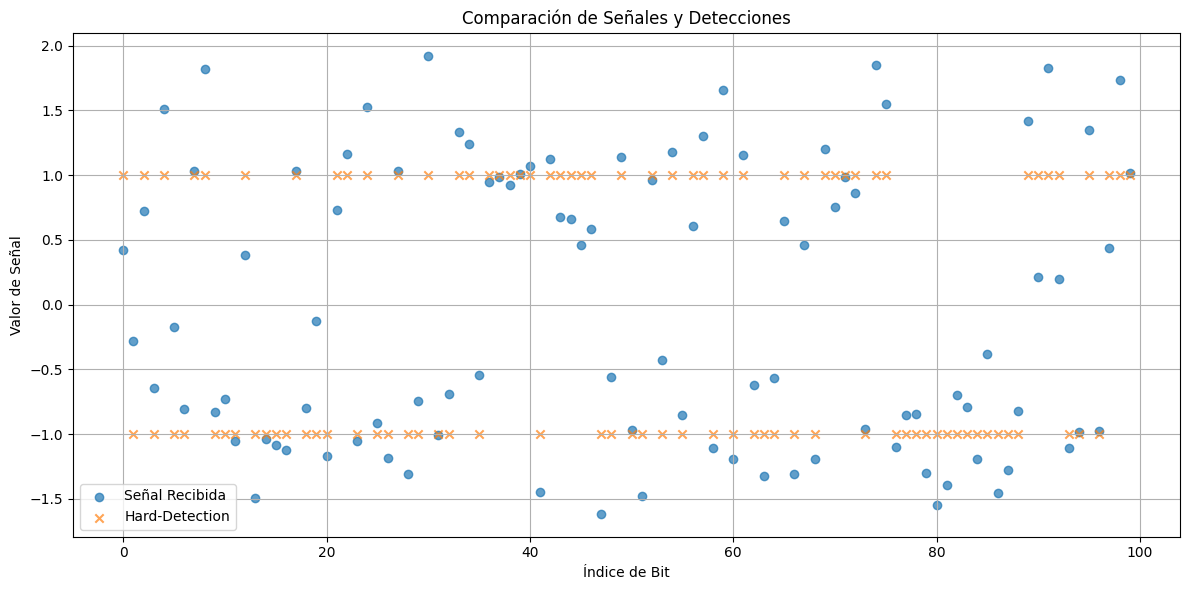

In [17]:
# Graficar señal recibida y decisiones hard detection
plt.figure(figsize=(12, 6))
plt.scatter(range(100), received_signal[:100], label="Señal Recibida", alpha=0.7)
plt.scatter(range(100), bits_rx_hard[:100] * 2 - 1, label="Hard-Detection", alpha=0.7, marker="x")
plt.xlabel("Índice de Bit")
plt.ylabel("Valor de Señal")
plt.title("Comparación de Señales y Detecciones")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

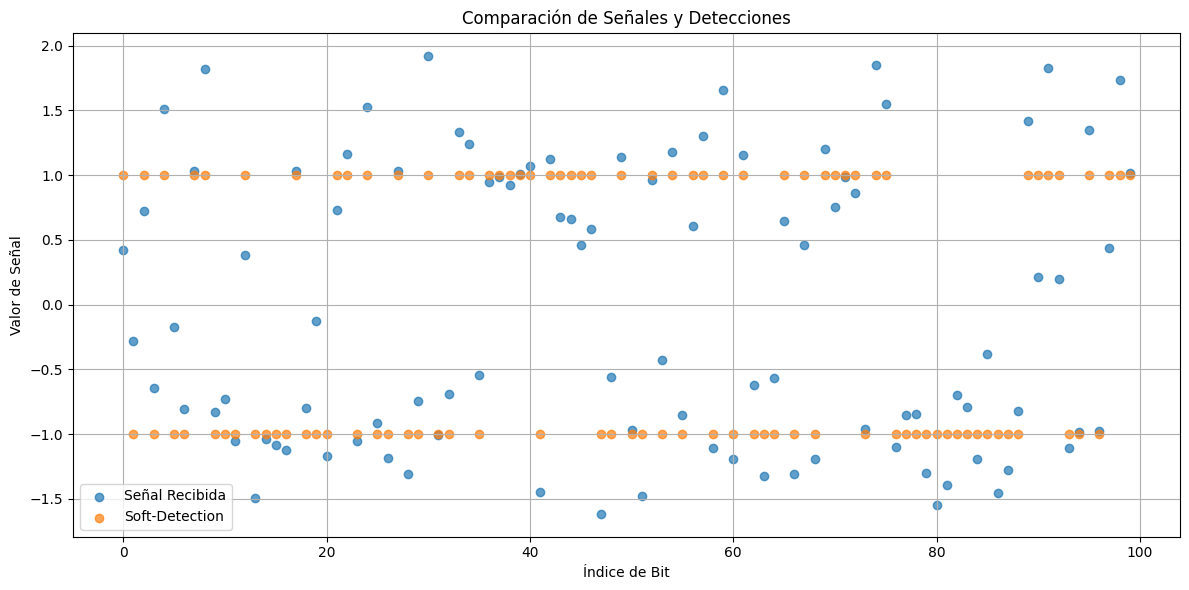

In [16]:
# Graficar señal recibida y decisiones soft detection
plt.figure(figsize=(12, 6))
plt.scatter(range(100), received_signal[:100], label="Señal Recibida", alpha=0.7)
plt.scatter(range(100), bits_rx_soft[:100] * 2 - 1, label="Soft-Detection", alpha=0.7, marker="o")
plt.xlabel("Índice de Bit")
plt.ylabel("Valor de Señal")
plt.title("Comparación de Señales y Detecciones")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

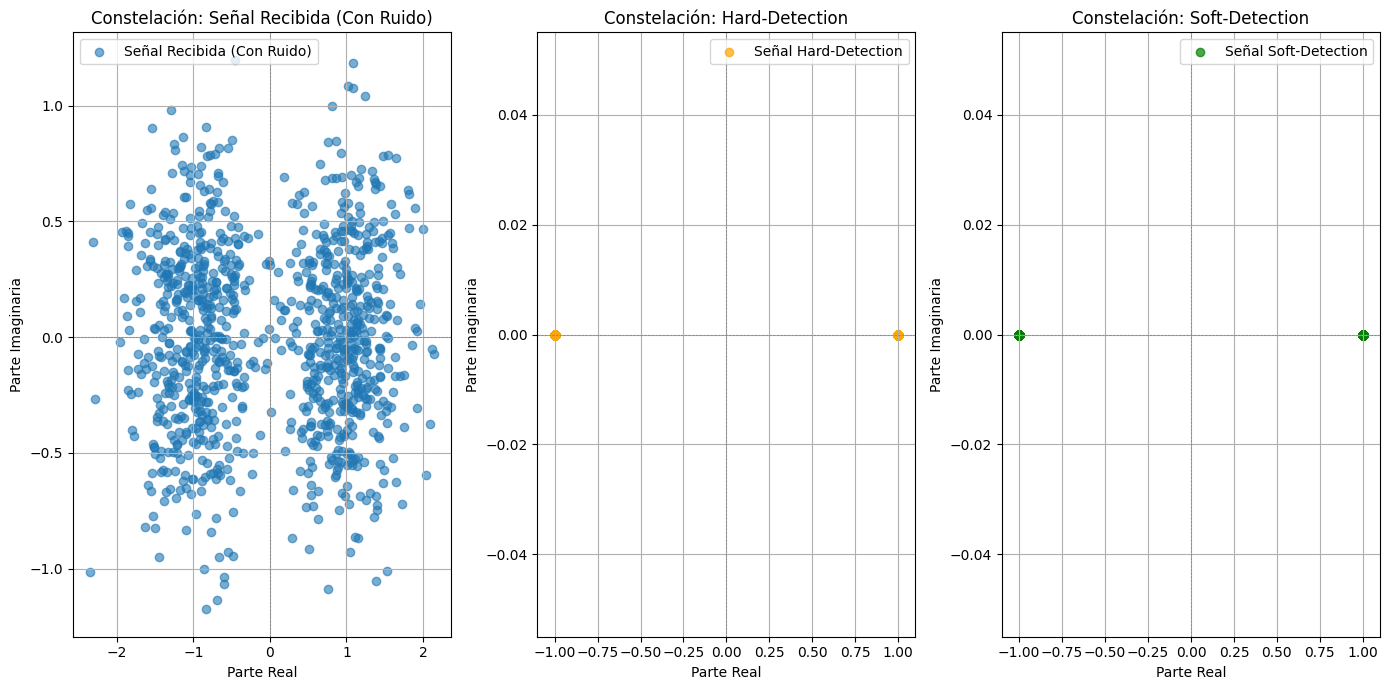

In [21]:
# Decodificación basada en Soft-Detection
def soft_to_hard(llr_values):
    return (llr_values > 0).astype(int)

# Configuración del sistema
num_bits = 1000        # Número de bits a transmitir
snr_db = 5             # Relación señal a ruido en dB
bits_tx = generar_bits(num_bits)  # Bits transmitidos
mod_signal = bpsk_modulacion(bits_tx) + 0j  # Señal modulada (BPSK en plano complejo)

# Paso por el canal AWGN
received_signal = canal_awgn(mod_signal, snr_db)

# HARD-DETECTION
bits_rx_hard = hard_detection(received_signal)
hard_decision_signal = bpsk_modulacion(bits_rx_hard)  # Reconstrucción tras Hard-Detection

# SOFT-DETECTION
noise_variance = 10**(-snr_db / 10)  # Varianza del ruido
llr_values = soft_detection(received_signal, noise_variance)
bits_rx_soft = soft_to_hard(llr_values)
soft_decision_signal = bpsk_modulacion(bits_rx_soft)  # Reconstrucción tras Soft-Detection

# Graficar la constelación
plt.figure(figsize=(14, 7))

# Antes de la detección
plt.subplot(1, 3, 1)
plt.scatter(received_signal.real, received_signal.imag, alpha=0.6, label="Señal Recibida (Con Ruido)")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("Constelación: Señal Recibida (Con Ruido)")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginaria")
plt.grid()
plt.legend()

# Después de Hard-Detection
plt.subplot(1, 3, 2)
plt.scatter(hard_decision_signal, np.zeros(len(hard_decision_signal)), color='orange', alpha=0.7, label="Señal Hard-Detection")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("Constelación: Hard-Detection")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginaria")
plt.grid()
plt.legend()

# Después de Soft-Detection
plt.subplot(1, 3, 3)
plt.scatter(soft_decision_signal, np.zeros(len(soft_decision_signal)), color='green', alpha=0.7, label="Señal Soft-Detection")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("Constelación: Soft-Detection")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginaria")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
